In [1]:
# Third party imports.
from dotenv import load_dotenv
from matplotlib import pyplot
from langchain_core.load import loads

# Local imports.
from sunshower.core import start

/home/victor/sunshower/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-11-24 14:44:42,738	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [2]:
# Load my API keys as environment variables.
load_dotenv()

True

In [3]:
task = """
Generate a report about cyber security news from the past week.
"""

start(file_name="example.yaml", task=task)

In [4]:
# Define the prices of each model. 
# - Currently, only have token costs from OpenAI. Need to get other providers.
# - This data was last collected on 2025-11-18.
PRICES = {
    "gpt-4o-2024-08-06": {
        "input": 3.75 / 1_000_000,
        "output": 15.00 / 1_000_000,
    },
    "gpt-4.1-2025-04-14": {
        "input": 3.00 / 1_000_000,
        "output": 12.00 / 1_000_000,
    },
    "gpt-5-2025-08-07": {
        "input": 1.25 / 1_000_000,
        "output": 10.00 / 1_000_000,
    },
}

In [5]:
# Save the results of each experiment in a Python list.
experiments = []
with open(file="results.ndjson", mode="r", encoding="UTF-8") as input_file:
    for line in input_file.readlines():
        object = loads(line)
        experiments.append(object)

/tmp/ipykernel_1014344/1006424013.py:5: LangChainBetaWarning: The function `loads` is in beta. It is actively being worked on, so the API may change.
  object = loads(line)


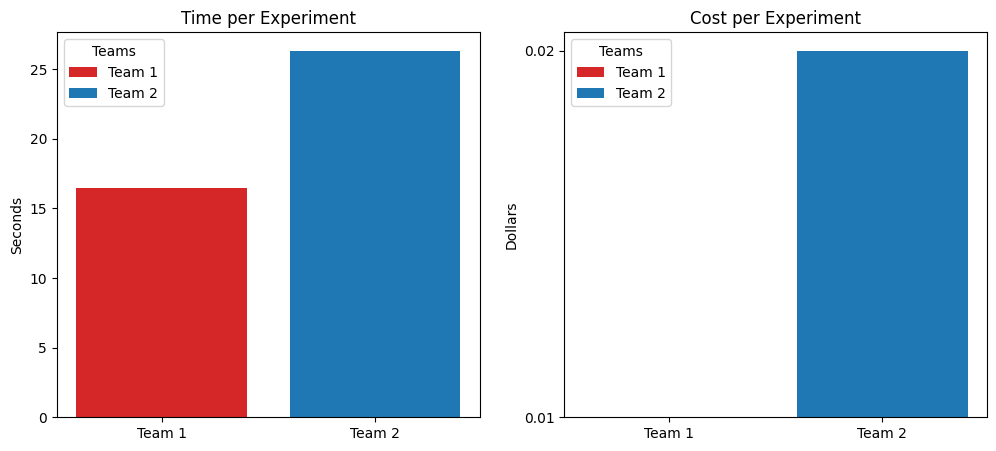

In [6]:
# Init the figure and the charts it will contain.
figure, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(12, 5))

# Get data for the "Time per Experiments" chart.
time_chart_names = []
time_chart_times = []
for experiment in experiments:
    time_chart_names.append(experiment["name"])
    time_chart_times.append(float(experiment["time_taken"]))

# Build the "Time per Experiments" chart.
ax1.bar(
    time_chart_names,
    time_chart_times,
    label=time_chart_names,
    color=["tab:red", "tab:blue", "tab:orange"]
)
ax1.set_ylabel("Seconds")
ax1.set_title("Time per Experiment")
ax1.legend(title="Teams")

# Get data for the "Cost of Experiments" chart.
cost_of_experiments = {}
for experiment in experiments:
    costs = []
    for message in experiment["messages"]:
        if message.type == "ai":
            model_name = message.response_metadata["model_name"]
            prompt_tokens = message.response_metadata["token_usage"]["prompt_tokens"]
            prompt_cost = prompt_tokens * PRICES[model_name]["output"]
            completion_tokens = message.response_metadata["token_usage"]["completion_tokens"]
            completion_cost = completion_tokens * PRICES[model_name]["output"]
            costs.append(prompt_cost + completion_cost)
    cost_of_experiments[experiment["name"]] = f"{sum(costs):.2f}"

# Build the "Cost of Experiments" chart.
ax2.bar(
    cost_of_experiments.keys(),
    cost_of_experiments.values(),
    label=cost_of_experiments.keys(),
    color=["tab:red", "tab:blue", "tab:orange"]
)
ax2.set_ylabel("Dollars")
ax2.set_title("Cost per Experiment")
ax2.legend(title="Teams")

# Show the figure.
pyplot.show()